# MACHINE LEARNING REVIEW - 3¶
# CRIME PREDICTION

TEAM MEMBERS :

G.HARINISRI

MADASU DEEPIKA

SHIVANI

In [1]:
#IMPORTING THE REQUIRED LIBRARIES

In [2]:
import pandas as pd 
import numpy as np
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from  sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import validation_curve
from sklearn.preprocessing import binarize
import matplotlib.pyplot as plot
from sklearn import linear_model
from IPython.display import Image 
from sklearn.preprocessing import PolynomialFeatures
from sklearn import tree
import sklearn.preprocessing as prep
import pydotplus 
import math
from sklearn.linear_model import RidgeCV
import sklearn.linear_model as linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
#IMPORTING THE DATASET

In [4]:
df=pd.read_csv('communities-crime-clean.csv')
df['highCrime'] = np.where(df['ViolentCrimesPerPop']>0.1, 1, 0)

In [5]:
df

,state,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,...,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop,highCrime
0,1,Alabastercity,7,0.01,0.61,0.21,0.83,0.02,0.01,0.41,...,0.70,0.40,0.34,0.57,0.05,0.06,0.01,0.0,0.06,0
1,1,AlexanderCitycity,10,0.01,0.41,0.55,0.57,0.01,0.00,0.47,...,0.93,0.66,0.82,0.84,0.11,0.03,0.01,0.0,0.14,1
2,1,Annistoncity,3,0.03,0.34,0.86,0.30,0.04,0.01,0.41,...,0.77,0.59,0.70,0.64,0.06,0.11,0.04,0.0,1.00,1
3,1,Athenscity,8,0.01,0.38,0.35,0.71,0.04,0.01,0.39,...,0.78,0.56,0.67,0.71,0.09,0.05,0.00,0.0,0.23,1
4,1,Auburncity,1,0.04,0.37,0.32,0.70,0.21,0.02,1.00,...,0.49,0.12,0.00,0.15,0.09,0.09,0.01,0.0,0.15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1988,56,Gillettecity,9,0.01,0.53,0.00,0.96,0.02,0.06,0.47,...,0.32,0.34,0.56,0.55,0.04,0.11,0.11,0.0,0.15,1
1989,56,GreenRivercity,9,0.00,0.67,0.01,0.91,0.03,0.21,0.56,...,0.35,0.55,0.70,0.58,0.03,0.09,0.77,0.0,0.06,0
1990,56,Laramiecity,3,0.03,0.40,0.02,0.90,0.14,0.12,0.89,...,0.37,0.24,0.18,0.34,0.03,0.20,0.02,0.0,0.12,1
1991,56,RockSpringscity,7,0.01,0.45,0.02,0.92,0.06,0.14,0.48,...,0.46,0.59,0.75,0.71,0.05,0.09,0.32,0.0,0.27,1


In [6]:
from sklearn.model_selection import cross_val_score
from sklearn import tree
initial=pd.read_csv('communities-crime-clean.csv')
initial = initial.drop('communityname', 1)
initial = initial.drop('ViolentCrimesPerPop', 1)
initial = initial.drop('fold', 1)

initial = initial.drop('state', 1)


In [7]:
#CREATION OF NEW COLUMN HIGH CRIME which is true if the crime rate per capita (ViolentCrimesPerPop) is greater than 0.1, and false otherwise.
Y = df['highCrime']
Y

0       0
1       1
2       1
3       1
4       1
       ..
1988    1
1989    0
1990    1
1991    1
1992    0
Name: highCrime, Length: 1993, dtype: int32

In [8]:

clf = tree.DecisionTreeClassifier(max_depth=3)
#clf = tree.DecisionTreeClassifier()
clf = clf.fit(initial, Y)
clf
y_pred = clf.predict(initial)
list(initial)


['population',
 'householdsize',
 'racepctblack',
 'racePctWhite',
 'racePctAsian',
 'racePctHisp',
 'agePct12t21',
 'agePct12t29',
 'agePct16t24',
 'agePct65up',
 'numbUrban',
 'pctUrban',
 'medIncome',
 'pctWWage',
 'pctWFarmSelf',
 'pctWInvInc',
 'pctWSocSec',
 'pctWPubAsst',
 'pctWRetire',
 'medFamInc',
 'perCapInc',
 'whitePerCap',
 'blackPerCap',
 'indianPerCap',
 'AsianPerCap',
 'OtherPerCap',
 'HispPerCap',
 'NumUnderPov',
 'PctPopUnderPov',
 'PctLess9thGrade',
 'PctNotHSGrad',
 'PctBSorMore',
 'PctUnemployed',
 'PctEmploy',
 'PctEmplManu',
 'PctEmplProfServ',
 'PctOccupManu',
 'PctOccupMgmtProf',
 'MalePctDivorce',
 'MalePctNevMarr',
 'FemalePctDiv',
 'TotalPctDiv',
 'PersPerFam',
 'PctFam2Par',
 'PctKids2Par',
 'PctYoungKids2Par',
 'PctTeen2Par',
 'PctWorkMomYoungKids',
 'PctWorkMom',
 'NumIlleg',
 'PctIlleg',
 'NumImmig',
 'PctImmigRecent',
 'PctImmigRec5',
 'PctImmigRec8',
 'PctImmigRec10',
 'PctRecentImmig',
 'PctRecImmig5',
 'PctRecImmig8',
 'PctRecImmig10',
 'PctSpeakEng

In [9]:
feature_name=list(initial)

# GAUSSIAN NAIVES BAYES

In [10]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(initial, Y).predict(initial)
print("mislabel num is ",(Y != y_pred).sum())

mislabel num is  442


In [11]:
print ('sigma is ',gnb.sigma_)

sigma is  [[6.81498760e-04 2.28437713e-02 5.73265762e-03 7.94160248e-03
  2.70027449e-02 8.35039880e-03 2.87941670e-02 2.37637596e-02
  3.36759141e-02 3.19108885e-02 9.11024762e-04 1.91669506e-01
  5.42988193e-02 2.87975801e-02 4.97254590e-02 2.32947856e-02
  3.03545912e-02 1.72356188e-02 3.03831459e-02 4.65940634e-02
  4.70152959e-02 4.69964679e-02 4.39360975e-02 4.27060375e-02
  5.22838409e-02 5.28783603e-02 4.55105121e-02 3.48961975e-04
  3.18947110e-02 2.26268880e-02 2.48441075e-02 5.58906929e-02
  2.05663717e-02 2.64897578e-02 3.77681157e-02 3.29268513e-02
  3.61302093e-02 4.15674198e-02 2.34322839e-02 2.86713094e-02
  2.19983645e-02 2.37871705e-02 1.63629651e-02 1.73984529e-02
  1.53158290e-02 1.91697130e-02 1.59638353e-02 3.14366408e-02
  3.03493322e-02 4.23265128e-05 6.58895806e-03 2.42284125e-04
  5.29353458e-02 4.81758386e-02 4.30947621e-02 3.75609602e-02
  2.78438137e-02 2.43797777e-02 2.26668852e-02 1.95472031e-02
  1.54807068e-02 9.00828352e-03 2.00861516e-02 2.07895877e-0

In [12]:
variance=gnb.sigma_
variance

array([[6.81498760e-04, 2.28437713e-02, 5.73265762e-03, 7.94160248e-03,
        2.70027449e-02, 8.35039880e-03, 2.87941670e-02, 2.37637596e-02,
        3.36759141e-02, 3.19108885e-02, 9.11024762e-04, 1.91669506e-01,
        5.42988193e-02, 2.87975801e-02, 4.97254590e-02, 2.32947856e-02,
        3.03545912e-02, 1.72356188e-02, 3.03831459e-02, 4.65940634e-02,
        4.70152959e-02, 4.69964679e-02, 4.39360975e-02, 4.27060375e-02,
        5.22838409e-02, 5.28783603e-02, 4.55105121e-02, 3.48961975e-04,
        3.18947110e-02, 2.26268880e-02, 2.48441075e-02, 5.58906929e-02,
        2.05663717e-02, 2.64897578e-02, 3.77681157e-02, 3.29268513e-02,
        3.61302093e-02, 4.15674198e-02, 2.34322839e-02, 2.86713094e-02,
        2.19983645e-02, 2.37871705e-02, 1.63629651e-02, 1.73984529e-02,
        1.53158290e-02, 1.91697130e-02, 1.59638353e-02, 3.14366408e-02,
        3.03493322e-02, 4.23265128e-05, 6.58895806e-03, 2.42284125e-04,
        5.29353458e-02, 4.81758386e-02, 4.30947621e-02, 3.756096

In [13]:
standard_deviation =np.sqrt( variance)

In [14]:
print('standard deviation is',standard_deviation);

standard deviation is [[0.02610553 0.15114156 0.07571432 0.08911567 0.16432512 0.09138052
  0.16968844 0.15415499 0.18350998 0.17863619 0.03018319 0.43780076
  0.23302107 0.1696985  0.22299206 0.15262629 0.17422569 0.1312845
  0.17430762 0.21585658 0.21683011 0.21678669 0.20960939 0.20665439
  0.2286566  0.22995295 0.21333193 0.01868052 0.1785909  0.15042237
  0.15762014 0.23641213 0.1434098  0.16275674 0.19434021 0.18145757
  0.19007948 0.2038809  0.15307607 0.16932604 0.14831846 0.1542309
  0.12791781 0.1319032  0.12375714 0.13845473 0.12634807 0.17730381
  0.1742106  0.00650588 0.0811724  0.01556548 0.23007683 0.21948995
  0.20759278 0.1938065  0.16686466 0.15614025 0.15055526 0.13981131
  0.12442149 0.09491198 0.14172562 0.14418595 0.15338782 0.13668098
  0.16240318 0.17785614 0.0850207  0.16327493 0.21913924 0.03787575
  0.15721907 0.17839801 0.13290406 0.18877236 0.23275359 0.16060552
  0.15827313 0.23241737 0.24241174 0.24874649 0.22222077 0.22273864
  0.26484339 0.23468991 0.16

In [15]:
sum_standard=standard_deviation[0]+standard_deviation[1]

In [16]:
print('sum of standard deviation is',sum_standard);

sum of standard deviation is [0.18090396 0.32104802 0.36224083 0.34583323 0.39468395 0.36130877
 0.31536008 0.28800721 0.33771925 0.35744413 0.18648758 0.88573648
 0.39468334 0.34996749 0.41302745 0.3007648  0.34621898 0.3596506
 0.33738377 0.37181085 0.37103023 0.37354743 0.34380379 0.33999451
 0.39424443 0.39138112 0.36232262 0.17414735 0.40022378 0.37531708
 0.3578604  0.40691285 0.34802341 0.33341291 0.4008451  0.35063072
 0.38386177 0.36001972 0.31216248 0.34322233 0.29169457 0.30763423
 0.29603824 0.31596417 0.31089381 0.34948617 0.31069856 0.34040733
 0.3493666  0.13988042 0.32637243 0.12304267 0.43790782 0.41805047
 0.3960126  0.37656394 0.42847586 0.42119718 0.41777079 0.40720828
 0.38561802 0.3513528  0.35357607 0.35157803 0.33113133 0.30258436
 0.35753462 0.34794195 0.31938316 0.31158824 0.46910052 0.21895899
 0.35776559 0.33934362 0.37510429 0.37727859 0.46491116 0.40976154
 0.37933627 0.44617586 0.46206336 0.47093457 0.43254769 0.41542601
 0.4935774  0.42502282 0.32553874 

In [17]:
print ('theta is ',gnb.theta_)

theta is  [[2.04441454e-02 4.80713324e-01 4.76985195e-02 9.13458950e-01
  1.32422611e-01 5.02691790e-02 4.15827725e-01 4.64629879e-01
  3.15706595e-01 4.07429341e-01 2.77658143e-02 6.73660834e-01
  4.71022880e-01 6.20363392e-01 3.19663526e-01 6.20484522e-01
  4.50228802e-01 1.87173620e-01 4.90174966e-01 4.81561238e-01
  4.33055182e-01 4.25518170e-01 3.45585464e-01 2.14495289e-01
  3.72489906e-01 3.10955585e-01 4.52288022e-01 1.28936743e-02
  1.77321669e-01 2.20915209e-01 2.77981157e-01 4.50538358e-01
  2.56137281e-01 5.60646030e-01 4.11211306e-01 4.71130552e-01
  3.25760431e-01 5.22462988e-01 3.40390310e-01 3.90982503e-01
  3.60538358e-01 3.64024226e-01 4.76756393e-01 7.58869448e-01
  7.78761777e-01 8.10067295e-01 7.08371467e-01 4.95450875e-01
  5.42732167e-01 3.56662180e-03 1.04508748e-01 8.90982503e-03
  2.75908479e-01 3.05989233e-01 3.37927322e-01 3.56864065e-01
  1.19555855e-01 1.15020188e-01 1.16312248e-01 1.12018843e-01
  8.55531629e-01 7.21534320e-02 1.96541050e-01 1.99327052e-0

In [18]:
mean=gnb.theta_
print(mean)
difference=mean[0]-mean[1]

[[2.04441454e-02 4.80713324e-01 4.76985195e-02 9.13458950e-01
  1.32422611e-01 5.02691790e-02 4.15827725e-01 4.64629879e-01
  3.15706595e-01 4.07429341e-01 2.77658143e-02 6.73660834e-01
  4.71022880e-01 6.20363392e-01 3.19663526e-01 6.20484522e-01
  4.50228802e-01 1.87173620e-01 4.90174966e-01 4.81561238e-01
  4.33055182e-01 4.25518170e-01 3.45585464e-01 2.14495289e-01
  3.72489906e-01 3.10955585e-01 4.52288022e-01 1.28936743e-02
  1.77321669e-01 2.20915209e-01 2.77981157e-01 4.50538358e-01
  2.56137281e-01 5.60646030e-01 4.11211306e-01 4.71130552e-01
  3.25760431e-01 5.22462988e-01 3.40390310e-01 3.90982503e-01
  3.60538358e-01 3.64024226e-01 4.76756393e-01 7.58869448e-01
  7.78761777e-01 8.10067295e-01 7.08371467e-01 4.95450875e-01
  5.42732167e-01 3.56662180e-03 1.04508748e-01 8.90982503e-03
  2.75908479e-01 3.05989233e-01 3.37927322e-01 3.56864065e-01
  1.19555855e-01 1.15020188e-01 1.16312248e-01 1.12018843e-01
  8.55531629e-01 7.21534320e-02 1.96541050e-01 1.99327052e-01
  4.7851

In [19]:
print('difference is ',abs(difference))

difference is  [0.05925985 0.02754532 0.20970948 0.25426695 0.03400939 0.14958682
 0.01336427 0.04669012 0.03282941 0.02496266 0.05793819 0.03660317
 0.17500688 0.09893139 0.04483953 0.19882852 0.0331872  0.20786638
 0.01743097 0.16861724 0.13188718 0.09159017 0.08676146 0.01742329
 0.07996991 0.04179559 0.10544002 0.06794633 0.19998233 0.15111679
 0.16784284 0.14162636 0.17083072 0.09473403 0.02357131 0.04875455
 0.10439157 0.12939899 0.19256169 0.0693055  0.20242964 0.20754377
 0.01752361 0.23556545 0.25174578 0.23241129 0.19976347 0.00949313
 0.02555617 0.05217738 0.23148325 0.03374617 0.07071552 0.08726677
 0.09771268 0.11347994 0.09868415 0.10713981 0.10930375 0.11312516
 0.11117163 0.12515857 0.11329895 0.08381695 0.02612752 0.05484837
 0.0951913  0.19515619 0.17225112 0.16050433 0.18508641 0.08110169
 0.1167173  0.16269478 0.13146916 0.02198265 0.01202458 0.21082549
 0.10383673 0.08139318 0.07802628 0.07443205 0.08982967 0.09168913
 0.10611699 0.09806697 0.09837253 0.02605343 0.

In [20]:
normalized_feature=abs(difference)/sum_standard
print('normalized_feature is ',normalized_feature)

normalized_feature is  [0.32757633 0.08579815 0.57892282 0.73522995 0.08616867 0.41401382
 0.04237783 0.16211442 0.09720916 0.06983654 0.3106812  0.04132512
 0.44341087 0.28268738 0.10856307 0.66107643 0.09585609 0.57796756
 0.0516651  0.45350274 0.3554621  0.2451902  0.2523575  0.0512458
 0.20284346 0.10678999 0.29101143 0.39016571 0.49967628 0.40263766
 0.46901765 0.34805084 0.49085985 0.28413425 0.05880403 0.13904814
 0.27195094 0.35942195 0.61686366 0.20192596 0.69397809 0.67464461
 0.05919373 0.74554481 0.80974842 0.66500857 0.64294945 0.02788755
 0.07315    0.37301417 0.70926105 0.27426401 0.16148495 0.20874697
 0.24674133 0.30135635 0.23031436 0.25436973 0.2616357  0.27780662
 0.28829469 0.35621907 0.32043727 0.23840212 0.07890378 0.18126636
 0.26624359 0.56088721 0.53932437 0.51511679 0.39455597 0.3703967
 0.32623958 0.47943964 0.35048694 0.05826637 0.02586426 0.51450774
 0.27373266 0.182424   0.1688649  0.15805179 0.20767577 0.2207111
 0.21499563 0.23073342 0.3021838  0.070554

In [21]:
ind = np.argpartition(normalized_feature, -10)[-10:]

print('ind is ',ind)

ind is  [38 44 45 41 15 46 50  3 43 40]


In [22]:
print('10_max_normalized_feature is ',normalized_feature[ind])

for x in range(0, len(ind)):
    index=ind[x]
    print(index)
    print('feature_name[index] is ',feature_name[index])

10_max_normalized_feature is  [0.61686366 0.80974842 0.66500857 0.67464461 0.66107643 0.64294945
 0.70926105 0.73522995 0.74554481 0.69397809]
38
feature_name[index] is  MalePctDivorce
44
feature_name[index] is  PctKids2Par
45
feature_name[index] is  PctYoungKids2Par
41
feature_name[index] is  TotalPctDiv
15
feature_name[index] is  pctWInvInc
46
feature_name[index] is  PctTeen2Par
50
feature_name[index] is  PctIlleg
3
feature_name[index] is  racePctWhite
43
feature_name[index] is  PctFam2Par
40
feature_name[index] is  FemalePctDiv


In [23]:
from sklearn.model_selection import cross_val_score
fold=df['fold']
scores = cross_val_score(gnb, initial, Y,fold,'accuracy',10)

In [24]:
print('cross_val_accuracy is ',scores) 

cross_val_accuracy is  [0.775      0.8        0.825      0.79899497 0.70351759 0.65326633
 0.81407035 0.73366834 0.71356784 0.79899497]


In [25]:
print('cross_val_accuracy_avg is ',np.array(scores).mean()) 

cross_val_accuracy_avg is  0.761608040201005


In [26]:
scores = cross_val_score(gnb, initial, Y,fold,'precision',10)
print('cross_val_precision is ',scores) 

cross_val_precision is  [0.86363636 0.92929293 0.95       0.92079208 0.94594595 0.86842105
 0.92307692 1.         0.77868852 0.93814433]


In [27]:
print('cross_val_precision_avg is ',np.array(scores).mean()) 

cross_val_precision_avg is  0.9117998148278733


In [82]:
scores = cross_val_score(gnb, initial, Y,fold,'recall',10)
print('cross_val_recall is ',scores) 

cross_val_recall is  [0.76  0.736 0.76  0.744 0.56  0.528 0.768 0.576 0.76  0.728]


In [28]:
print('cross_val_recall_avg is ',np.array(scores).mean())

cross_val_recall_avg is  0.9117998148278733


Naive Bayes on average has worse accuracy and recall than Decision Tree on the dataset. This is likely due to correlations between features in the dataset that by definition the Naive Bayes classifier assumes are conditionally independent. Interestingly, both find PctKids2Par to be the most predictive feature.

# POLYNOMIAL SVC

In [29]:
df=pd.read_csv('communities-crime-clean.csv')
df['highCrime'] = np.where(df['ViolentCrimesPerPop']>0.1, 1, 0)
Y = df['highCrime']
fold=df['fold']


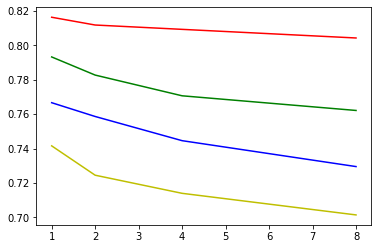

In [30]:
from sklearn.svm import SVC
x=[]
y=[]
for k in range (1,5):
    y.append([])
for i in range (0,4):
    for j in range (1,5):
        poly_svc = SVC(C=2**i, kernel='poly', degree=j).fit(initial, Y)
        scores = cross_val_score(poly_svc,initial,Y,fold,'accuracy',10)
        y[j-1].append(np.mean(scores))
    x.append(2**i)    

plt.plot(x,y[0],'r-',
         x,y[1],'g-',
         x,y[2],'b-',
         x,y[3],'y-')
plt.show()

X-axis is error penalty (C) term Y-axis is accuracy
Red=Degree 1
Green=Degree 2
Blue=Degree 3
Yellow=Degree 4
Degree 2 is picked for best performance against linear model. Error penalty value of 8 is picked for best performance.


In [31]:
poly_svc = SVC(C=8, kernel='poly', degree=2).fit(initial, Y)
scores = cross_val_score(poly_svc,initial,Y,fold,'accuracy',10)
print ('Cross validation accuracy is', np.mean(scores)*100)

Cross validation accuracy is 76.21356783919597


In [32]:
scores = cross_val_score(poly_svc,initial,Y,fold,'precision',10)
print ('Cross validation precision is', np.mean(scores)*100)

Cross validation precision is 82.33190451729901


In [33]:
scores = cross_val_score(poly_svc,initial,Y,fold,'recall',10)
print ('Cross validation recall is', np.mean(scores)*100)

Cross validation recall is 80.55999999999999


There is no reasonable method for evaluation of most predictive features with a Polynomial SVC.
Compared with Linear SVC on this data set a polynomial SVC of degree 2 is able to slightly outperform the linear SVC on classification.


#  RANDOM FOREST 

In [34]:
#Decision Forest using a Random Forest algorithm. Nodes are chosen from a the best split of a random subset of the features and the best of a set of random thresholds for those features.

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
df=pd.read_csv('communities-crime-clean.csv')
df['highCrime'] = np.where(df['ViolentCrimesPerPop']>0.1, 1, 0)
initial=pd.read_csv('communities-crime-clean.csv')
initial = initial.drop('communityname', 1)
initial = initial.drop('ViolentCrimesPerPop', 1)
initial = initial.drop('fold', 1)

initial = initial.drop('state', 1)
fold=df['fold']
Y = df['highCrime']
feature_name=list(initial)
clf = RandomForestClassifier(n_estimators=10,max_features='sqrt')
clf = clf.fit(initial, Y)
#dot_data = tree.export_graphviz(clf, out_file=None, 
#                          class_names='highCrime',  
#                          special_characters=True)  
#graph = pydotplus.graph_from_dot_data(dot_data)  


In [36]:
y_pred = clf.predict(initial)
feature_importance=clf.feature_importances_
print("feature importance is ",feature_importance)
print ("length feature array",len(feature_importance))
for i in range (0,len(feature_importance)):
    if(feature_importance[i]!=0):
        print("index is ",feature_name[i])

feature importance is  [0.00294728 0.00566074 0.0327593  0.04679887 0.00658648 0.01416964
 0.00336956 0.00411271 0.00570734 0.00412275 0.00490928 0.00126246
 0.00364986 0.00449767 0.00669029 0.01987476 0.00310242 0.00753429
 0.00918827 0.00263761 0.00380499 0.00699136 0.0111621  0.00652778
 0.00521069 0.00503988 0.00173308 0.00612886 0.0061579  0.00841761
 0.00754645 0.00595642 0.01772906 0.00466248 0.00461478 0.0031201
 0.00535659 0.00393017 0.02052958 0.00950331 0.01481188 0.01987356
 0.006446   0.02137897 0.08400491 0.04518841 0.03793652 0.00551687
 0.00663818 0.07273361 0.01194284 0.00386251 0.00591597 0.00404629
 0.00518042 0.00718002 0.00413587 0.00588547 0.00634929 0.00433019
 0.00749832 0.00924833 0.01126007 0.01163453 0.00297134 0.00476614
 0.00450314 0.00267636 0.0417929  0.00756014 0.00054844 0.01865681
 0.00432019 0.00563418 0.00492414 0.00640014 0.00551243 0.0271067
 0.00821551 0.00581292 0.0074072  0.00275397 0.00441292 0.00846671
 0.00479608 0.00405821 0.00929621 0.00438

In [37]:
index_max = np.argmax(feature_importance)
print(index_max)

44


In [38]:
print('coefficient[max] is ',feature_name[index_max])

coefficient[max] is  PctKids2Par


In [39]:
fold=df['fold']
scores = cross_val_score(clf, initial, Y,fold,'accuracy',10)
print('cross_val_accuracy is ',scores) 

print ('Cross validation accuracy is', np.mean(scores)*100)
scores = cross_val_score(clf,initial,Y,fold,'precision',10)
print ('Cross validation precision is', np.mean(scores)*100)
scores = cross_val_score(clf,initial,Y,fold,'recall',10)
print ('Cross validation recall is', np.mean(scores)*100)

cross_val_accuracy is  [0.78       0.83       0.845      0.80904523 0.75376884 0.74371859
 0.81909548 0.7638191  0.77386935 0.77386935]
Cross validation accuracy is 78.92185929648242
Cross validation precision is 85.43853306751727
Cross validation recall is 81.44


Performance is relatively consistent with that of the standard Decision Tree. The most predictive feature is the same as Decision Tree, PctKids2Par. Random Decision Forest does not seem to offer much for the increase in complexity of the model.Random Classifier shows good results in terms of metrics and would be a good model to predict the crime data.

# GRADIENT BOOSTING CLASSIFIER

In [41]:
clf = GradientBoostingClassifier()

In [42]:
X = df.drop('ViolentCrimesPerPop', axis=1).drop('state', axis=1).drop('communityname', axis=1).drop('fold', axis=1).drop('highCrime', axis=1)
features = list(X.columns)
y =df["highCrime"]


In [43]:
clf.fit(X, y)

GradientBoostingClassifier()

In [44]:
acc_scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy').mean()


In [45]:
pre_scores = cross_val_score(clf, X, y, cv=10, scoring='precision').mean()

In [46]:
rec_scores = cross_val_score(clf, X, y, cv=10, scoring='recall').mean()

In [47]:
print ('Accuracy GradientBoostingClassifier(Clean Data) is', acc_scores)

Accuracy GradientBoostingClassifier(Clean Data) is 0.797713567839196


In [48]:
print ('Precision GradientBoostingClassifier(Clean Data)is', pre_scores)

Precision GradientBoostingClassifier(Clean Data)is 0.8489863275937353


In [49]:
print ('Recall is GradientBoostingClassifier(Clean Data) is ', rec_scores)

Recall is GradientBoostingClassifier(Clean Data) is  0.8328


# CONCLUSION

We have applied various models including: Decision Trees, Gaussian NB, Linear  SVC, Polynomial SVC,K means, Gradient Boosting Classifier and Random Forests. We also performed the 10 fold cross validation. 
Random Forest Classifier giving the most balanced results with respect to accuracy, precision, recall and F1 scoreout of three models for prediction of ‘Per Capita Violent Crimes’ feature.